<img src = "poule.png" style = "height:50">

<center><h1><span style = "color:indianred">Étude de marché<br><center><font size="4"> - clustering & visualisation - </font></center></br><br><center><font size="4"> version finale</font></center></br></span></h1></center>

**D'après un premier clustering effectué, le poids de la variable 'population' est bien important pour avoir une classification apportant de l'information utile à notre sujet. De ce fait, un deuxième clustering est effectué sans la variable population**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
data = pd.read_csv("data.csv", index_col = 0).reset_index(drop=True)
data_copy = data.copy()
data = data.drop('Population', axis = 1)

<h2><span style="color:indianred"> 4. Normalisation des données </span></h2>

In [36]:
# Aperçu de données

data.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,5.0,1.53,0.33,0.54,57.0,132.185185,29.0,28.0
1,Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,1667.0
2,Albanie,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,13.0
3,Algérie,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,275.0
4,Allemagne,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1514.0


In [37]:
# Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           169 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)                 169 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)         169 non-null    float64
 3   Disponibilité de matière grasse en quantité (g/personne/jour)  169 non-null    float64
 4   Disponibilité de protéines en quantité (g/personne/jour)       169 non-null    float64
 5   Disponibilité intérieure                                       169 non-null    float64
 6   Exportations - Quantité                                        169 non-null    float64
 7   Importations - Quantité                                        

In [68]:
# Standardisation des valeurs numériques

scaler = StandardScaler()
X_norm = scaler.fit_transform(data.drop('Zone', axis = 1))

In [69]:
# Combinaison avec valeurs qualitatives

data_norm = pd.merge(data['Zone'], pd.DataFrame(X_norm, columns = data.iloc[:,1:].columns),
                     left_index=True, right_index=True)
data_norm.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,-1.168443,-1.199115,-1.107754,-1.196185,-0.290056,0.000000,-0.327248,-0.282022
1,Afrique du Sud,1.116325,0.961707,1.024391,1.233962,0.652476,-0.151225,2.272622,0.377246
2,Albanie,0.156060,-0.261030,0.355108,-0.171834,-0.294629,-0.288930,-0.279003,-0.288055
3,Algérie,-0.886986,-0.892324,-0.828089,-0.940097,-0.189446,-0.288930,-0.471983,-0.182669
4,Allemagne,-0.075728,-0.064304,-0.192270,0.132606,0.479153,1.123095,4.030885,0.315704


In [70]:
# Describe

data_norm.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
count,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02
mean,3.875927e-17,-6.043818e-17,-2.562053e-17,4.861332e-17,-2.529206e-17,2.627747e-18,6.405133e-17,2.266432e-17
std,1.002972e+00,1.002972e+00,1.002972e+00,1.002972e+00,1.002972e+00,1.002972e+00,1.002972e+00,1.002972e+00
min,-1.251224e+00,-1.287673e+00,-1.179463e+00,-1.285726e+00,-3.152082e-01,-2.889301e-01,-4.827038e-01,-2.932842e-01
25%,-8.869860e-01,-8.493099e-01,-8.280894e-01,-8.881635e-01,-3.024033e-01,-2.889301e-01,-4.666222e-01,-2.876529e-01
50%,-1.750656e-01,-1.402111e-01,-2.878823e-01,-1.019921e-01,-2.694764e-01,-2.714437e-01,-3.969349e-01,-2.643231e-01
75%,5.202985e-01,6.207577e-01,4.244262e-01,5.767298e-01,-1.460007e-01,0.000000e+00,-4.313821e-02,-1.070482e-01
max,2.771954e+00,3.278139e+00,3.082436e+00,3.698134e+00,8.037241e+00,8.941694e+00,5.247731e+00,8.521350e+00


<h2><span style="color:indianred"> 5. ACP </span></h2>

### ACP 2 components

In [5]:
# PCA

model_2 = PCA(n_components = 2)
pca_2 = model_2.fit_transform(data_norm.drop('Zone', axis = 1))

La part de variance expliquée par pca 1 est  0.49
La part de variance expliquée par pca 2 est  0.33


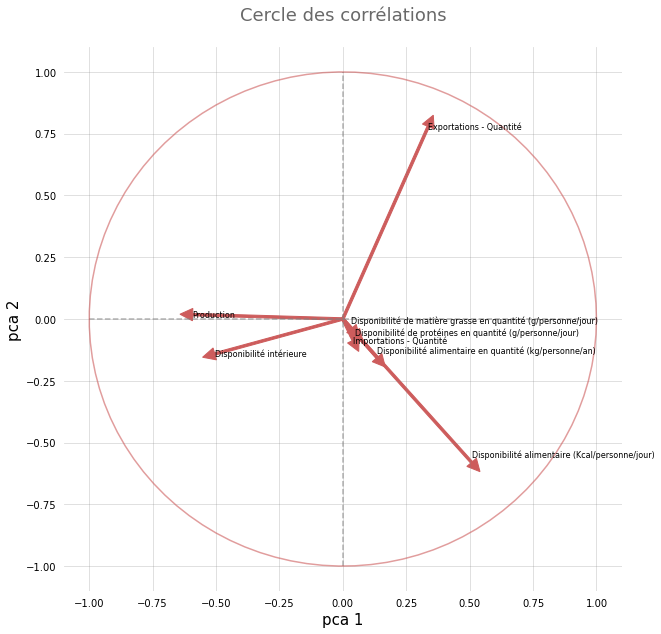

In [229]:
# Corrélation des variables

fig = plt.figure(figsize = (10,10))

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.title("Cercle des corrélations\n", fontsize = 18, color ='dimgray')

for i in range (0, 3) :
    plt.arrow(0, 0, model_2.components_[0,i], model_2.components_[1,i], 
              head_width = 0.05, head_length = 0.05, width = 0.01, color = 'indianred')
    plt.text(model_2.components_[0, i], model_2.components_[1, i]+0.02, data_norm.columns[i+1], size = 8)

for i in range (3, 8) :
    plt.arrow(0, 0, model_2.components_[0,i], model_2.components_[1,i], 
              head_width = 0.05, head_length = 0.05, width = 0.01, color = 'indianred')
    plt.text(model_2.components_[0, i], model_2.components_[1, i] - 0.01, data_norm.columns[i+1], size = 8)
    
plt.plot([-1, 1], [0, 0], color='grey', ls='--', alpha = 0.6)
plt.plot([0, 0], [-1, 1], color='grey', ls='--', alpha = 0.6)
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), color='indianred', alpha = 0.6)

plt.xlabel('pca 1', size = 15)
plt.ylabel('pca 2', size = 15);

print("La part de variance expliquée par pca 1 est ", round(model_2.explained_variance_ratio_[0],2))
print("La part de variance expliquée par pca 2 est ", round(model_2.explained_variance_ratio_[1],2))

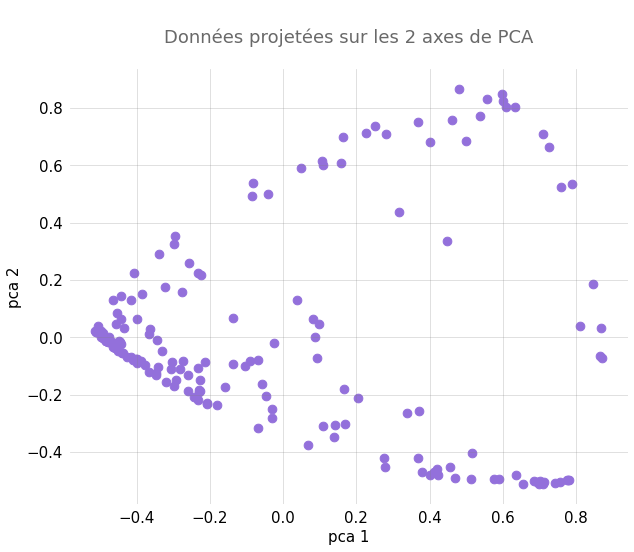

La part de variance expliquée est 0.82


In [42]:
# Visualisation

fig = plt.figure(figsize = (10,8))

ax = fig.add_subplot(111)
ax.scatter(pca_2[:, 0], pca_2[:, 1], color = 'mediumpurple', s = 75)
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

ax.set_xlabel('pca 1', size = 15)
ax.set_ylabel('pca 2', size = 15)

ax.set_title("\nDonnées projetées sur les 2 axes de PCA\n", fontsize = 18, color ='dimgray')
plt.tick_params(labelsize=15)
plt.show();

print("La part de variance expliquée est", round(model_2.explained_variance_ratio_.sum(),2))

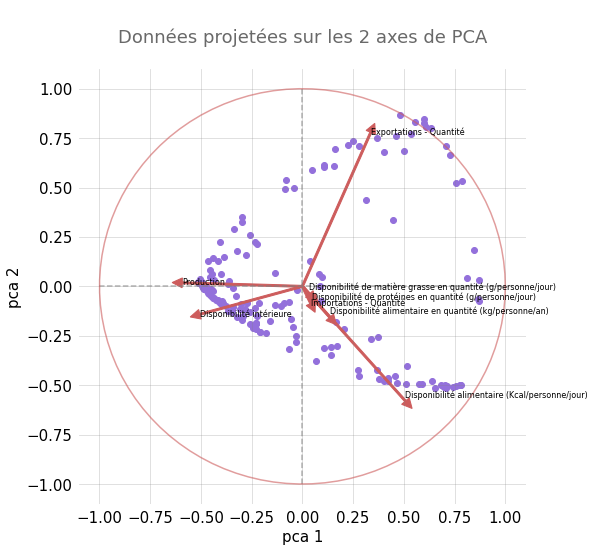

La part de variance expliquée est 0.82


In [128]:
# Visualisation

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111)
ax.scatter(pca_2[:, 0], pca_2[:, 1], color = 'mediumpurple')
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

for i in range (0, 3) :
    plt.arrow(0, 0, model_2.components_[0,i], model_2.components_[1,i], 
              head_width = 0.05, head_length = 0.05, width = 0.01, color = 'indianred')
    plt.text(model_2.components_[0, i], model_2.components_[1, i]+0.02, data_norm.columns[i+1], size = 8)

for i in range (3, 8) :
    plt.arrow(0, 0, model_2.components_[0,i], model_2.components_[1,i], 
              head_width = 0.05, head_length = 0.05, width = 0.01, color = 'indianred')
    plt.text(model_2.components_[0, i], model_2.components_[1, i] - 0.01, data_norm.columns[i+1], size = 8)
    
plt.plot([-1, 1], [0, 0], color='grey', ls='--', alpha = 0.6)
plt.plot([0, 0], [-1, 1], color='grey', ls='--', alpha = 0.6)
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), color='indianred', alpha = 0.6)

ax.set_xlabel('pca 1', size = 15)
ax.set_ylabel('pca 2', size = 15)

ax.set_title("\nDonnées projetées sur les 2 axes de PCA\n", fontsize = 18, color ='dimgray')
plt.tick_params(labelsize=15)
plt.show();

### ACP 3 components

In [129]:
# PCA

model_3 = PCA(n_components = 3)
pca_3 = model_3.fit_transform(data_norm.drop('Zone', axis = 1))

La part de variance expliquée par pca 1 est  0.49
La part de variance expliquée par pca 2 est  0.33
La part de variance expliquée par pca 3 est  0.13


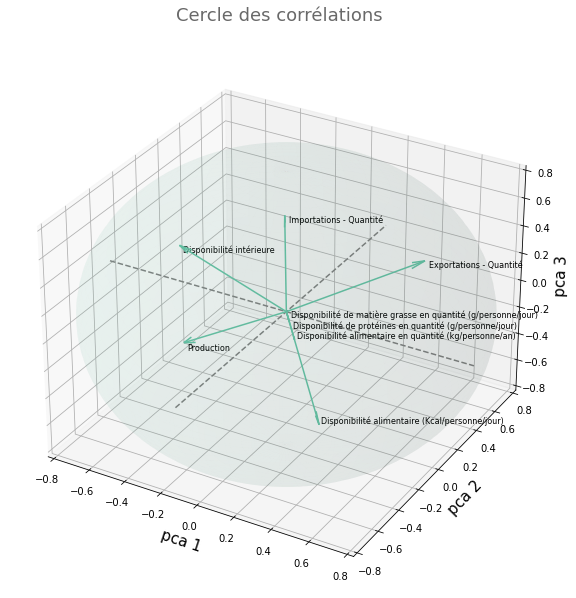

In [227]:
# Corrélation des variables

fig = plt.figure(figsize = (15,10))

ax = fig.add_subplot(111, projection='3d')
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.title("Cercle des corrélations\n", fontsize = 18, color ='dimgray')

ax.set_xlim([-0.8,0.8])
ax.set_ylim([-0.8,0.8])
ax.set_zlim([-0.8,0.8])

for i in range (0,3) :
    ax.quiver(0,0,0, model_3.components_[0,i], model_3.components_[1,i], model_3.components_[2,i],
              arrow_length_ratio = 0.1)
    ax.text(model_2.components_[0, i], model_2.components_[1, i]+0.02, model_3.components_[2,i], 
             data_norm.columns[i+1], size = 8)

for i in range (3,8) :
    ax.quiver(0,0,0, model_3.components_[0,i], model_3.components_[1,i], model_3.components_[2,i],
              arrow_length_ratio = 0.1)
    ax.text(model_2.components_[0, i]+0.05, model_2.components_[1, i]-.05, model_3.components_[2,i], 
             data_norm.columns[i+1], size = 8)
    
plt.plot([-1, 1, 1], [0, 0, 0], color='grey', ls='--')
plt.plot([0, 0, 0], [-1, 1, 1], color='grey', ls='--')
ax.plot_surface(np.outer(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, np.pi, 100))),
                np.outer(np.sin(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, np.pi, 100))),
                np.outer(np.ones(np.size(np.linspace(0, 2 * np.pi, 100))), np.cos(np.linspace(0, np.pi, 100))),
                alpha = 0.05)
    
ax.set_xlabel('pca 1', size = 15)
ax.set_ylabel('pca 2', size = 15)
ax.set_zlabel('pca 3', size = 15);

print("La part de variance expliquée par pca 1 est ", round(model_3.explained_variance_ratio_[0],2))
print("La part de variance expliquée par pca 2 est ", round(model_3.explained_variance_ratio_[1],2))
print("La part de variance expliquée par pca 3 est ", round(model_3.explained_variance_ratio_[2],2))

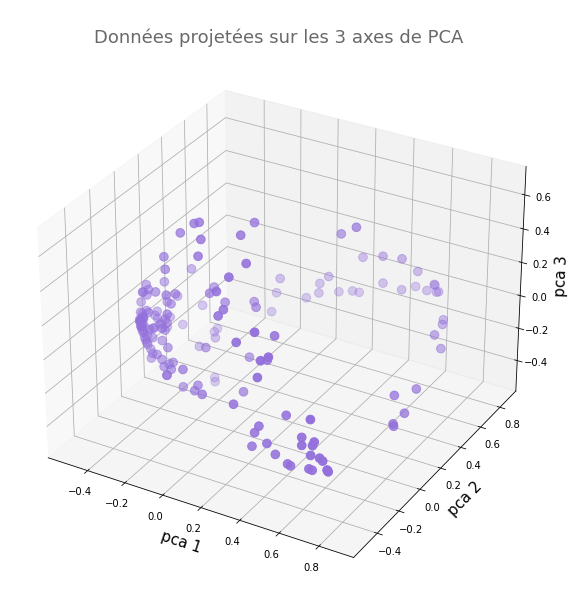

La part de variance expliquée est 0.96


In [44]:
# Visualisation

fig = plt.figure(figsize = (15,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], color = 'mediumpurple', s = 75)
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

ax.set_xlabel('pca 1', size = 15)
ax.set_ylabel('pca 2', size = 15)
ax.set_zlabel('pca 3', size = 15)

ax.set_title("\nDonnées projetées sur les 3 axes de PCA", fontsize = 18, color ='dimgray')
plt.show();

print("La part de variance expliquée est", round(model_3.explained_variance_ratio_.sum(),2))

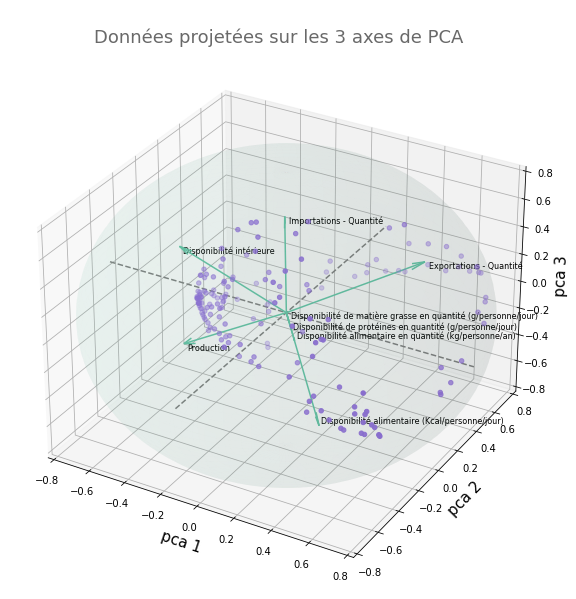

In [230]:
# Visualisation

fig = plt.figure(figsize = (15,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], color = 'mediumpurple')
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

ax.set_xlim([-0.8,0.8])
ax.set_ylim([-0.8,0.8])
ax.set_zlim([-0.8,0.8])

for i in range (0,3) :
    ax.quiver(0,0,0, model_3.components_[0,i], model_3.components_[1,i], model_3.components_[2,i],
              arrow_length_ratio = 0.1)
    ax.text(model_2.components_[0, i], model_2.components_[1, i]+0.02, model_3.components_[2,i], 
             data_norm.columns[i+1], size = 8)

for i in range (3,8) :
    ax.quiver(0,0,0, model_3.components_[0,i], model_3.components_[1,i], model_3.components_[2,i],
              arrow_length_ratio = 0.1)
    ax.text(model_2.components_[0, i]+0.05, model_2.components_[1, i]-.05, model_3.components_[2,i], 
             data_norm.columns[i+1], size = 8)
    
plt.plot([-1, 1, 1], [0, 0, 0], color='grey', ls='--')
plt.plot([0, 0, 0], [-1, 1, 1], color='grey', ls='--')
ax.plot_surface(np.outer(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, np.pi, 100))),
                np.outer(np.sin(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, np.pi, 100))),
                np.outer(np.ones(np.size(np.linspace(0, 2 * np.pi, 100))), np.cos(np.linspace(0, np.pi, 100))),
                alpha = 0.05)

ax.set_xlabel('pca 1', size = 15)
ax.set_ylabel('pca 2', size = 15)
ax.set_zlabel('pca 3', size = 15)

ax.set_title("\nDonnées projetées sur les 3 axes de PCA", fontsize = 18, color ='dimgray')
plt.show();

<h2><span style="color:indianred"> 6. Clustering </span></h2>

### Dendrogramme

In [45]:
# Création de données pour le clustering

data_pca = pd.DataFrame(pca_3, index = data.Zone )
data_pca = data_pca.rename(columns={0:"pca 1", 1:"pca 2", 2:"pca 3"})
data_pca.head()

,pca 1,pca 2,pca 3
Zone,,,
Afghanistan,0.281349,0.710437,0.154624
Afrique du Sud,-0.443846,-0.018364,0.100894
Albanie,0.410416,-0.471617,0.165064
Algérie,-0.482400,-0.013011,-0.108236
Allemagne,-0.323656,0.176373,0.186886


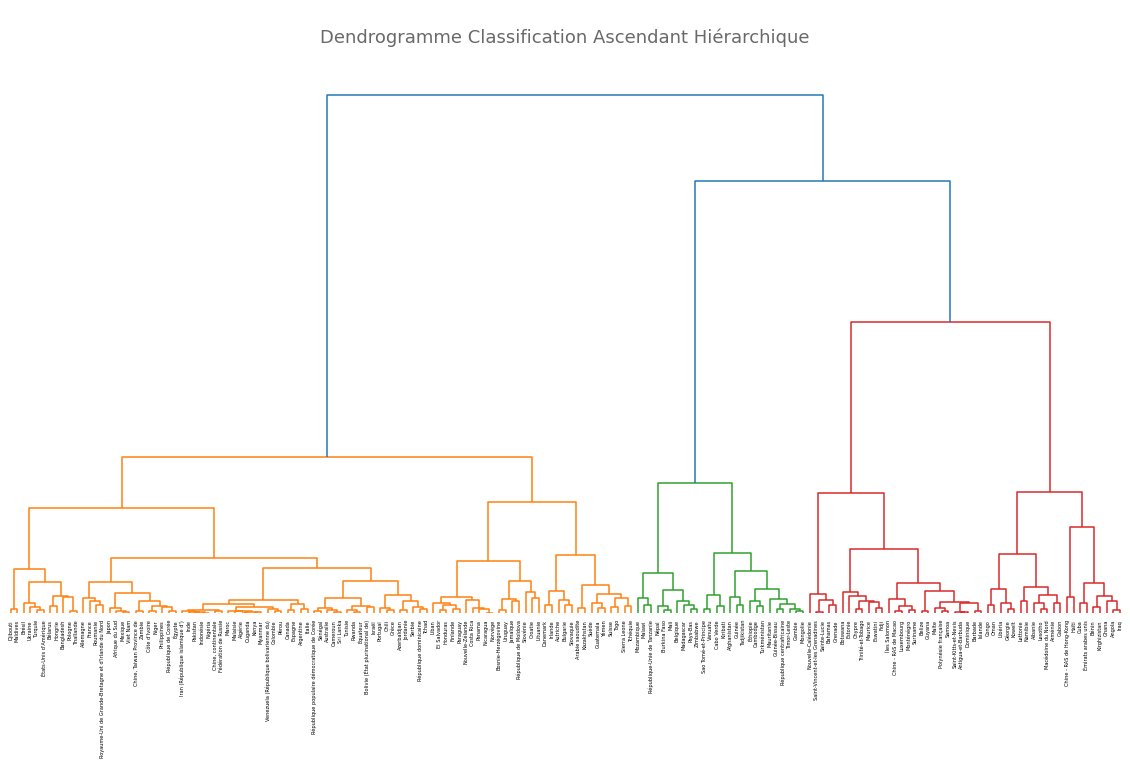

In [46]:
# Dendrogramme

z = linkage(data_pca, method = 'ward', metric = 'euclidean')

plt.figure(figsize=(20,10))
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.yticks([])
plt.title("\nDendrogramme Classification Ascendant Hiérarchique\n", fontsize = 18, color ='dimgray')
dendrogram(z, labels = data_pca.index, leaf_rotation = 90);

### Classification ascendante hiérarchique

In [47]:
# CAH à deux clusters

cah = AgglomerativeClustering(n_clusters = 4)
cah.fit(data_pca)

cluster_cah = cah.labels_

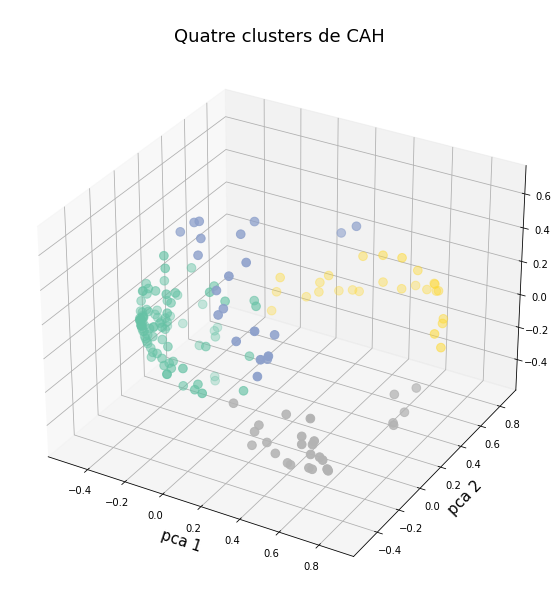

In [48]:
# Visualisation

fig = plt.figure(figsize = (15,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], c = cluster_cah, cmap = 'Set2', s = 75)
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

ax.set_xlabel('pca 1', size = 15)
ax.set_ylabel('pca 2', size = 15)

ax.set_title("\nQuatre clusters de CAH", fontsize = 18);

### K-means

In [49]:
# K-means

kmeans = KMeans(n_clusters = 4)
kmeans.fit(data_pca)

cluster_km = kmeans.labels_
centroids = kmeans.cluster_centers_

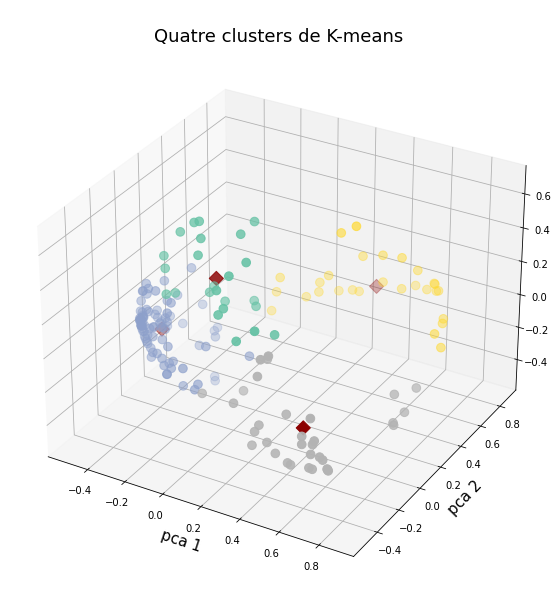

In [50]:
# Visualisation

fig = plt.figure(figsize = (15,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], c = cluster_km, cmap = 'Set2', s = 75)
ax.scatter(centroids[:, 0],centroids[:, 1], centroids[:, 2], marker = "D", color = "darkred", s=100)

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)


ax.set_xlabel('pca 1', size = 15)
ax.set_ylabel('pca 2', size = 15)

ax.set_title("\nQuatre clusters de K-means", fontsize = 18);

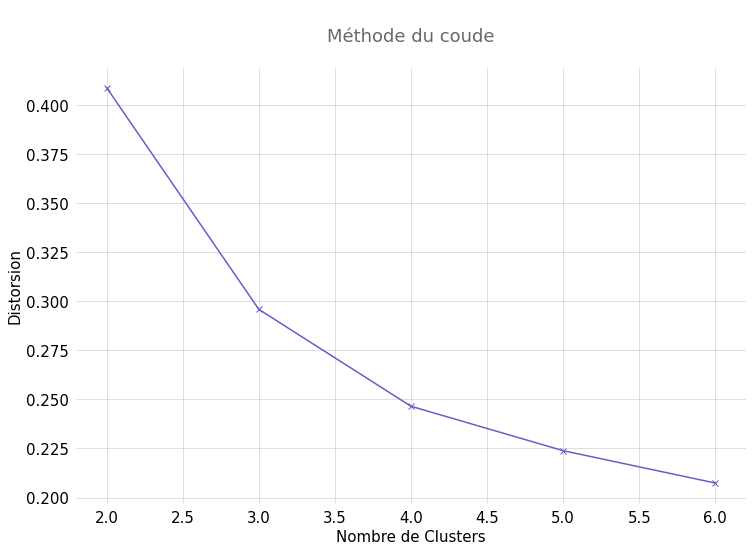

In [51]:
# Optimisation de nombre de cluster par méthode de coude

n_clusters = [2, 3, 4, 5, 6]  
distorsions = []

for i in n_clusters:
    cluster = KMeans(n_clusters = i)
    cluster.fit(data_pca)
    distorsions.append(sum(np.min(cdist(data_pca, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(data_pca, axis = 0))

    
fig = plt.figure(figsize = (12,8))

ax = fig.add_subplot(111)

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

plt.plot(n_clusters, distorsions, 'x-', color = 'slateblue')

plt.xlabel('Nombre de Clusters', fontsize = 15)
plt.ylabel('Distorsion', fontsize = 15)
plt.title("\nMéthode du coude\n", fontsize = 18, color ='dimgray')
plt.tick_params(labelsize=15)
plt.show()

In [52]:
# K-means à 3 clusters

kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(data_pca)

cluster_km_3 = kmeans_3.labels_
centroids_3 = kmeans_3.cluster_centers_

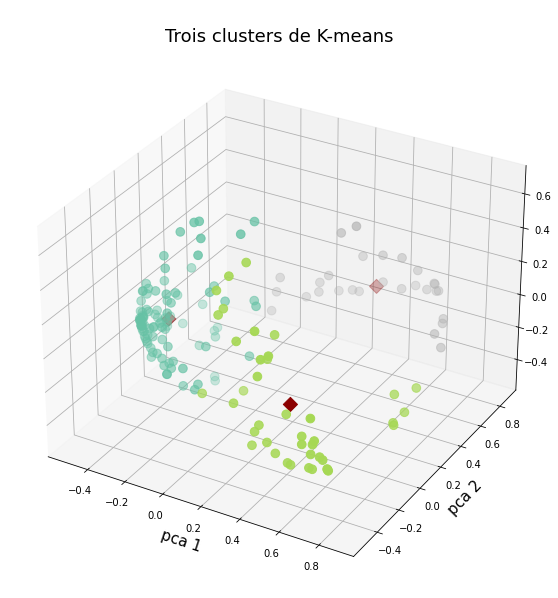

In [54]:
# Visualisation

fig = plt.figure(figsize = (15,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], c = cluster_km_3, cmap = 'Set2', s = 75)
ax.scatter(centroids_3[:, 0], centroids_3[:, 1], centroids_3[:, 2], marker = "D", color = "darkred", s=100)

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)


ax.set_xlabel('pca 1', size = 15)
ax.set_ylabel('pca 2', size = 15)

ax.set_title("\nTrois clusters de K-means", fontsize = 18);

In [21]:
# Données avec clustering

pd.set_option('display.max_row',170)
data_pca['cluster_cah'] = cluster_cah
data_pca['cluster_km'] = cluster_km
data_pca

,pca 1,pca 2,pca 3,cluster_cah,cluster_km
Zone,,,,,
Afghanistan,0.281349,0.710437,0.154624,2,2
Afrique du Sud,-0.443846,-0.018364,0.100894,0,1
Albanie,0.410416,-0.471617,0.165064,1,0
Algérie,-0.482400,-0.013011,-0.108236,0,1
Allemagne,-0.323656,0.176373,0.186886,0,1
Angola,-0.103573,-0.101668,0.678501,1,3
Antigua-et-Barbuda,0.774627,-0.499615,-0.224592,3,0
Arabie saoudite,-0.302564,-0.087273,0.410046,0,3
Argentine,-0.456131,0.045258,-0.142706,0,1


### Visualisation sur la carte

In [22]:
# Nombre de pays dans chaque cluster 

data_pca.cluster_km.value_counts()

1    84
0    33
2    28
3    24
Name: cluster_km, dtype: int64

In [23]:
# Liste des pays dans clsuter 0

data_pca[data_pca.cluster_km == 0].index

Index(['Albanie', 'Antigua-et-Barbuda', 'Bahamas', 'Barbade', 'Belize',
       'Botswana', 'Chine - RAS de Macao', 'Chypre', 'Dominique', 'Estonie',
       'Eswatini', 'Fidji', 'Grenade', 'Guyana', 'Islande', 'Jamaïque',
       'Lesotho', 'Lettonie', 'Luxembourg', 'Macédoine du Nord', 'Malte',
       'Maurice', 'Monténégro', 'Nouvelle-Calédonie', 'Polynésie française',
       'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines',
       'Sainte-Lucie', 'Samoa', 'Slovénie', 'Suriname', 'Trinité-et-Tobago',
       'Îles Salomon'],
      dtype='object', name='Zone')

In [24]:
# Liste des pays dans clsuter 1

data_pca[data_pca.cluster_km == 1].index

Index(['Afrique du Sud', 'Algérie', 'Allemagne', 'Argentine', 'Australie',
       'Azerbaïdjan', 'Bangladesh', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Brésil', 'Bélarus', 'Cameroun', 'Canada',
       'Chili', 'Chine, Taiwan Province de', 'Chine, continentale', 'Colombie',
       'Costa Rica', 'Croatie', 'Côte d'Ivoire', 'Djibouti', 'El Salvador',
       'Espagne', 'Finlande', 'France', 'Fédération de Russie', 'Grèce',
       'Guatemala', 'Honduras', 'Hongrie', 'Inde', 'Indonésie',
       'Iran (République islamique d')', 'Israël', 'Italie', 'Japon',
       'Jordanie', 'Kenya', 'Liban', 'Lituanie', 'Malaisie', 'Maldives',
       'Maroc', 'Mexique', 'Myanmar', 'Nicaragua', 'Niger', 'Nigéria',
       'Norvège', 'Nouvelle-Zélande', 'Ouganda', 'Pakistan', 'Panama',
       'Paraguay', 'Philippines', 'Pologne', 'Portugal', 'Pérou', 'Roumanie',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord', 'Rwanda',
       'République de Corée', 'République de Moldova',

In [25]:
# Liste des pays dans clsuter 2

data_pca[data_pca.cluster_km == 2].index

Index(['Afghanistan', 'Belgique', 'Burkina Faso', 'Cabo Verde', 'Cambodge',
       'Chine - RAS de Hong-Kong', 'Gambie', 'Guinée', 'Guinée-Bissau',
       'Haïti', 'Kiribati', 'Madagascar', 'Malawi', 'Mali', 'Mauritanie',
       'Mongolie', 'Mozambique', 'Népal', 'Pays-Bas',
       'République centrafricaine', 'République-Unie de Tanzanie',
       'Sao Tomé-et-Principe', 'Tadjikistan', 'Timor-Leste', 'Turkménistan',
       'Vanuatu', 'Zimbabwe', 'Éthiopie'],
      dtype='object', name='Zone')

In [26]:
# Liste des pays dans clsuter 3

data_pca[data_pca.cluster_km == 3].index

Index(['Angola', 'Arabie saoudite', 'Arménie', 'Autriche', 'Bulgarie', 'Bénin',
       'Congo', 'Cuba', 'Danemark', 'Gabon', 'Ghana', 'Géorgie', 'Iraq',
       'Irlande', 'Kazakhstan', 'Kirghizistan', 'Koweït', 'Libéria', 'Namibie',
       'Oman', 'Sierra Leone', 'Slovaquie', 'Tchéquie', 'Émirats arabes unis'],
      dtype='object', name='Zone')

<h2><span style="color:indianred"> 7. Analyse des clusters </span></h2>

### Données à étudier

In [27]:
# Ajout de cluster sur les données

data_cluster = data_copy.merge(data_pca[['cluster_cah','cluster_km']], on = "Zone")
data_cluster.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,cluster_cah,cluster_km
0,Afghanistan,5.0,1.53,0.33,0.54,57.0,132.185185,29.0,28.0,27100.536,2,2
1,Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,1667.0,49119.759,0,1
2,Albanie,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,13.0,3033.998,1,0
3,Algérie,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,275.0,34166.972,0,1
4,Allemagne,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1514.0,81277.830,0,1


### Analyse de clusters

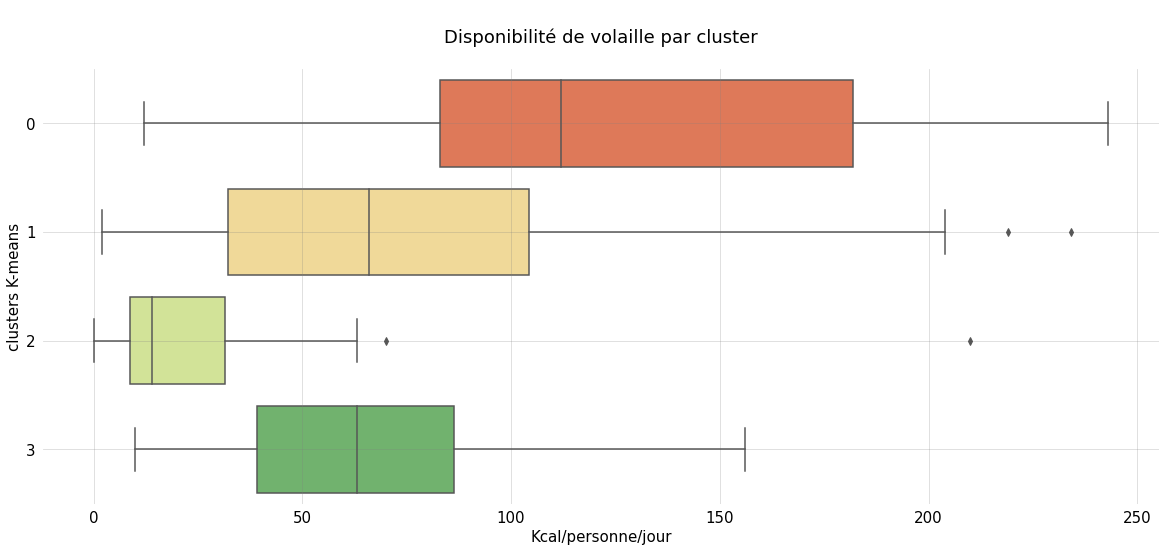

In [28]:
# Distribution disponibilité alimentaire

fig = plt.figure(figsize = (20,8))

ax = fig.add_subplot(111)
sns.boxplot(data=data_cluster, x='Disponibilité alimentaire (Kcal/personne/jour)', y='cluster_km', orient = 'h',
            palette = 'RdYlGn')
plt.title("\nDisponibilité de volaille par cluster\n", fontsize = 18)

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

ax.set_ylabel('clusters K-means', size = 15)
ax.set_xlabel('Kcal/personne/jour', size = 15)
plt.tick_params(labelsize=15);

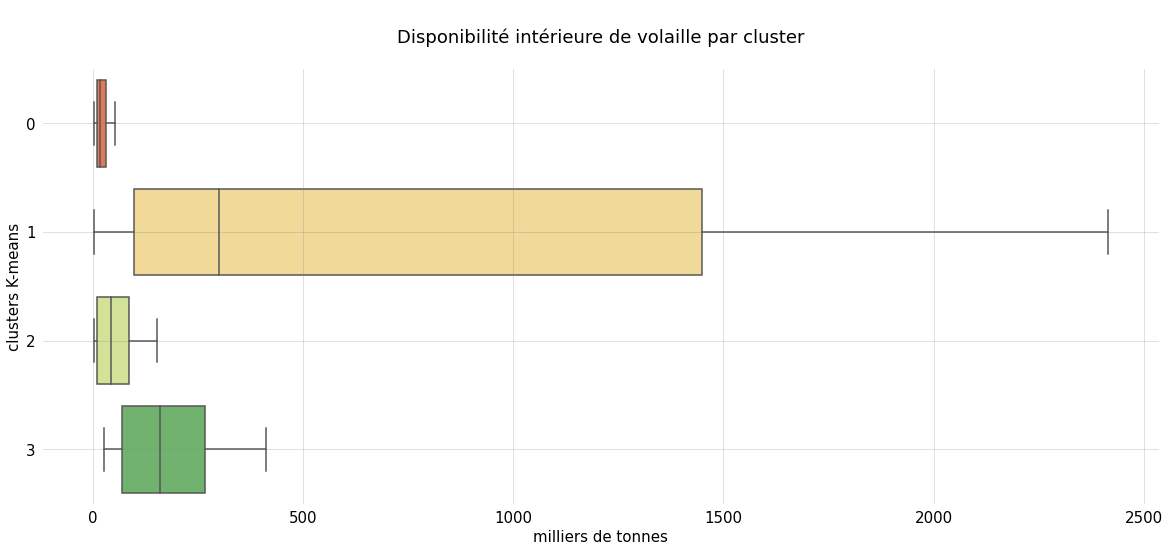

In [29]:
# Distribution disponibilité intérieure

fig = plt.figure(figsize = (20,8))

ax = fig.add_subplot(111)
sns.boxplot(data=data_cluster, x='Disponibilité intérieure', y='cluster_km', orient = 'h', 
            palette = 'RdYlGn', showfliers=False)
plt.title("\nDisponibilité intérieure de volaille par cluster\n", fontsize = 18)

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

ax.set_ylabel('clusters K-means', size = 15)
ax.set_xlabel('milliers de tonnes', size = 15)
plt.tick_params(labelsize=15);

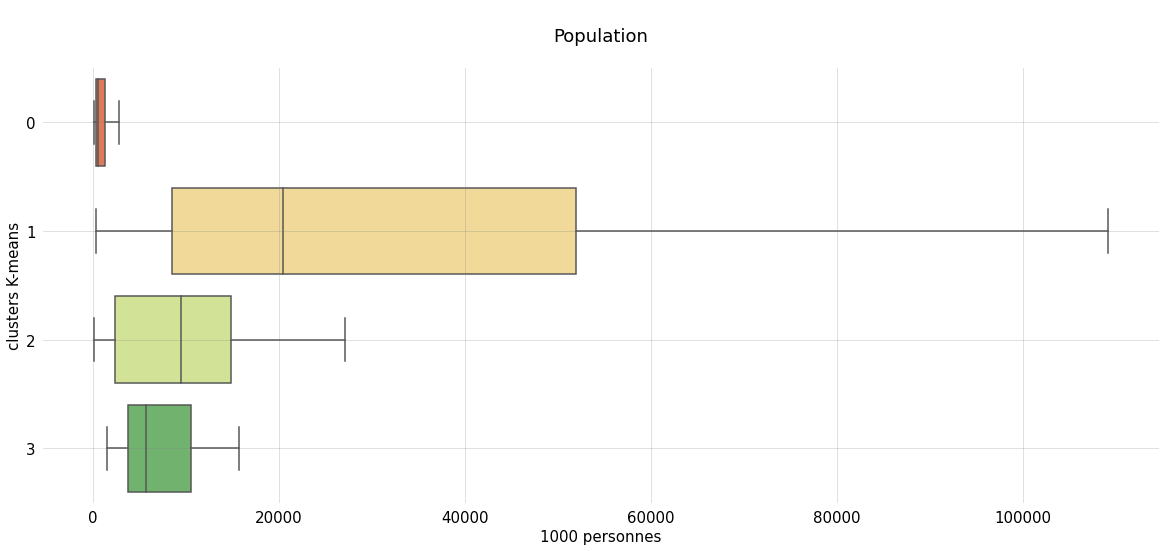

In [30]:
# Distribution population

fig = plt.figure(figsize = (20,8))

ax = fig.add_subplot(111)
sns.boxplot(data=data_cluster, x='Population', y='cluster_km', orient = 'h', 
            palette = 'RdYlGn', showfliers=False)
plt.title("\nPopulation\n", fontsize = 18)

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

ax.set_ylabel('clusters K-means', size = 15)
ax.set_xlabel('1000 personnes', size = 15)
plt.tick_params(labelsize=15);

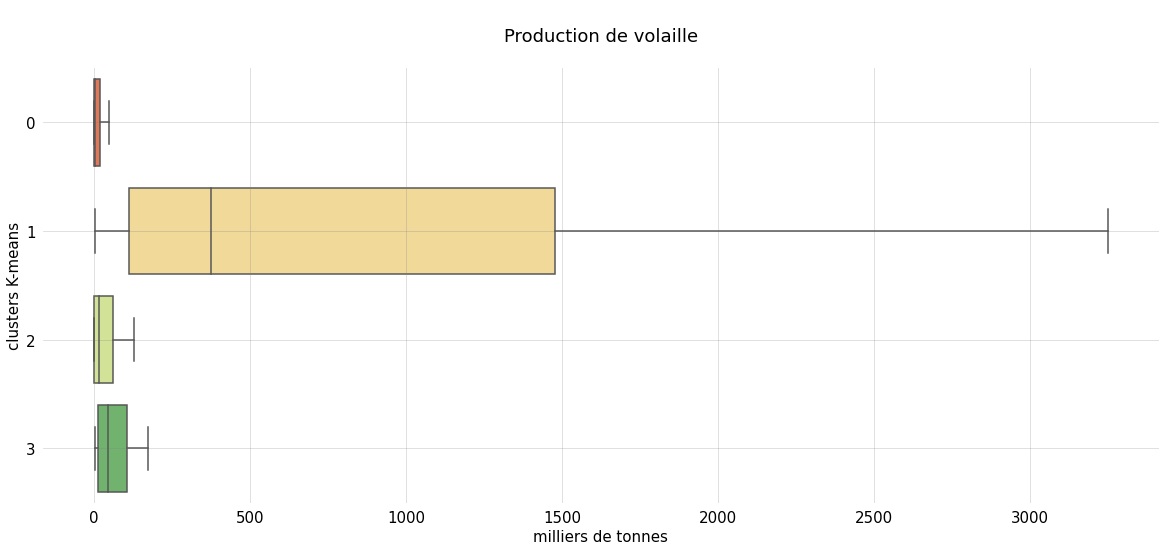

In [31]:
# Distribution production

fig = plt.figure(figsize = (20,8))

ax = fig.add_subplot(111)
sns.boxplot(data=data_cluster, x='Production', y='cluster_km', orient = 'h', 
            palette = 'RdYlGn',showfliers=False)
plt.title("\nProduction de volaille\n", fontsize = 18)

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

ax.set_ylabel('clusters K-means', size = 15)
ax.set_xlabel('milliers de tonnes', size = 15)
plt.tick_params(labelsize=15);

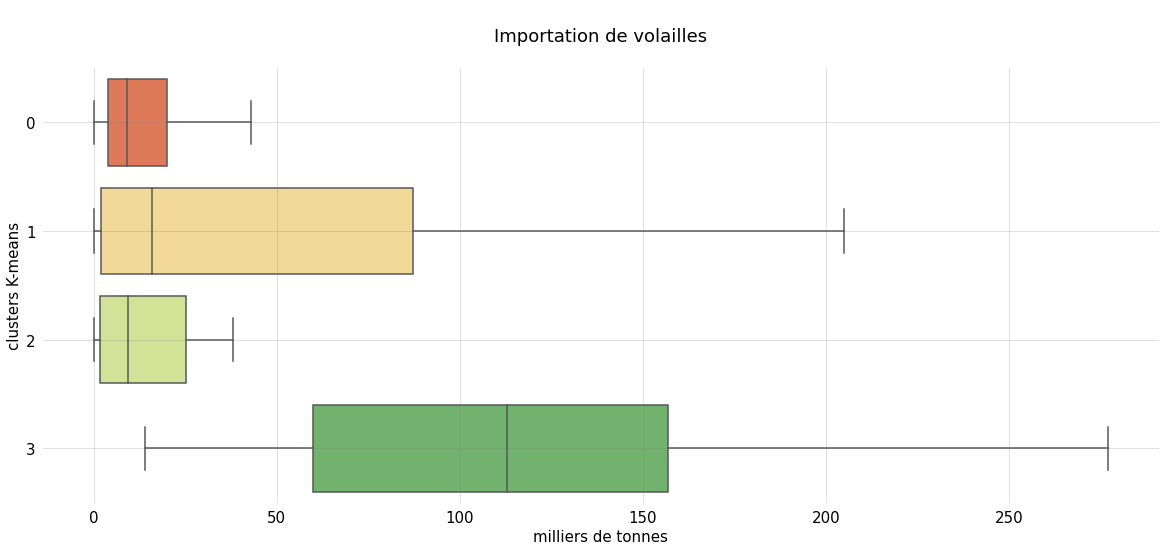

In [32]:
# Distribution Importation

fig = plt.figure(figsize = (20,8))

ax = fig.add_subplot(111)
sns.boxplot(data=data_cluster, x='Importations - Quantité', y='cluster_km', orient = 'h', 
            palette = 'RdYlGn',showfliers=False)
plt.title("\nImportation de volailles\n", fontsize = 18)

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

ax.set_ylabel('clusters K-means', size = 15)
ax.set_xlabel('milliers de tonnes', size = 15)
plt.tick_params(labelsize=15);

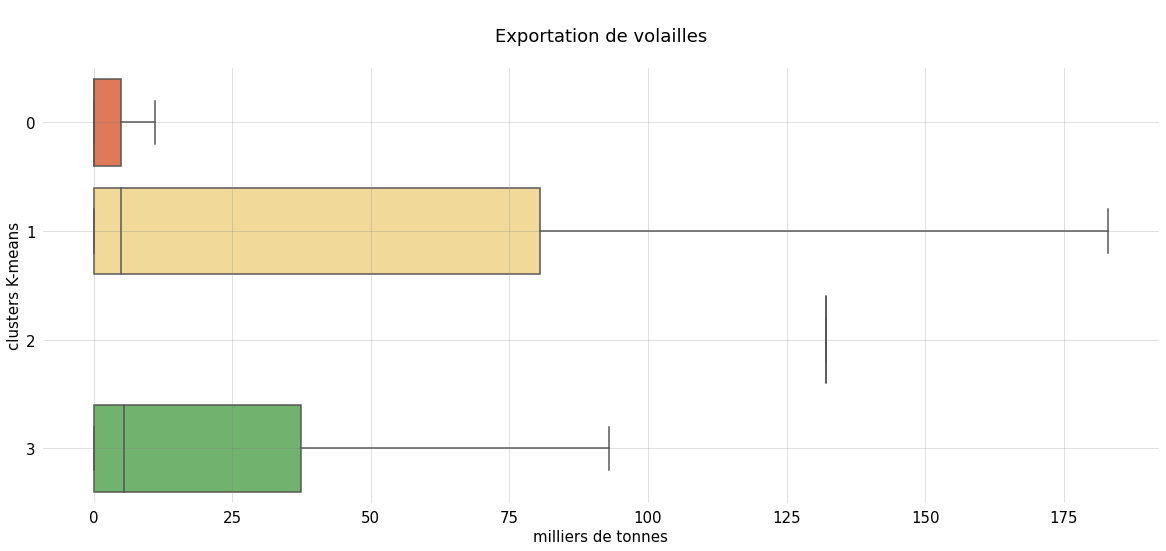

In [33]:
# Distribution Exportation

fig = plt.figure(figsize = (20,8))

ax = fig.add_subplot(111)
sns.boxplot(data=data_cluster, x='Exportations - Quantité', y='cluster_km', orient = 'h', 
            palette = 'RdYlGn',showfliers=False)
plt.title("\nExportation de volailles\n", fontsize = 18)

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

ax.set_ylabel('clusters K-means', size = 15)
ax.set_xlabel('milliers de tonnes', size = 15)
plt.tick_params(labelsize=15);

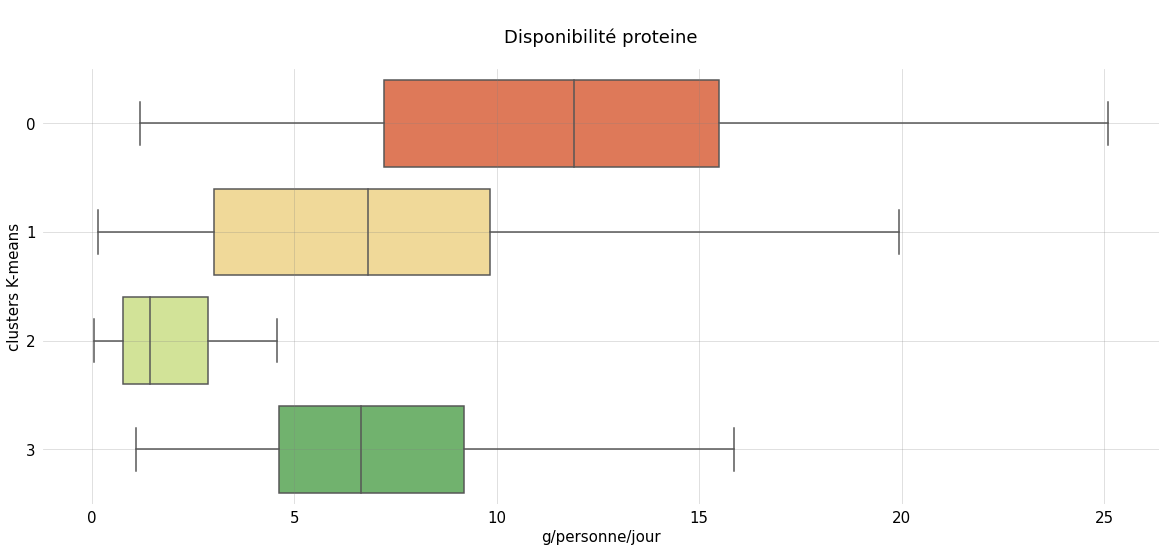

In [34]:
# Distribution Disponibilité protéine

fig = plt.figure(figsize = (20,8))

ax = fig.add_subplot(111)
sns.boxplot(data=data_cluster, x='Disponibilité de protéines en quantité (g/personne/jour)', y='cluster_km', 
            orient = 'h', palette = 'RdYlGn',showfliers=False)
plt.title("\nDisponibilité proteine\n", fontsize = 18)

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)

ax.set_ylabel('clusters K-means', size = 15)
ax.set_xlabel('g/personne/jour', size = 15)
plt.tick_params(labelsize=15);